In [75]:
import pandas as pd
import numpy as np

In [76]:
df=pd.read_csv(r'D:\NAM 3\Ki II\Đồ án II\code_cuoiky\du_lieu_da_xu_ly (1).csv', encoding='utf-8')

In [ ]:
# df.drop('price', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Mã hóa operating_system
le = LabelEncoder()
df['operating_system'] = le.fit_transform(df['operating_system'])  # Android=0, iOS=1 (ví dụ)

# Chuẩn hóa dữ liệu
features = [        ]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


In [ ]:
from sklearn.cluster import KMeans

# Khởi tạo và huấn luyện mô hình
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Gán nhãn cụm vào dataframe
df['cluster'] = kmeans.labels_


c:\Users\Asus-FPT\anaconda3\envs\ML01\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


c:\Users\Asus-FPT\anaconda3\envs\ML01\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Asus-FPT\anaconda3\envs\ML01\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Asus-FPT\anaconda3\envs\ML01\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Asus-FPT\anaconda3\envs\ML01\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

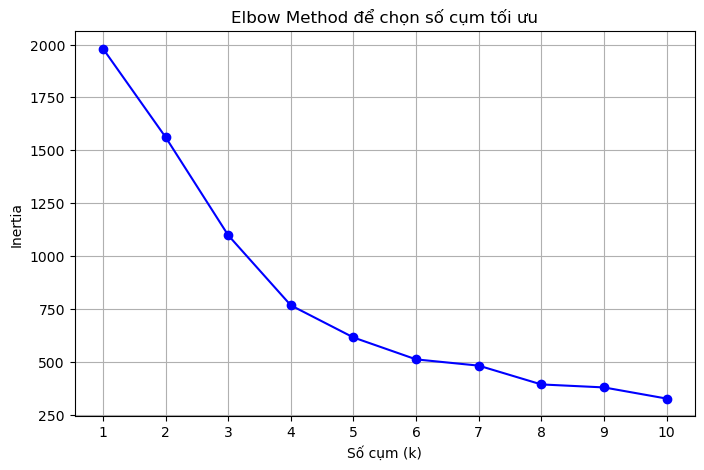

In [83]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tạo danh sách để lưu inertia
inertias = []
K = range(1, 11)  # Thử từ 1 đến 10 cụm

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # dùng dữ liệu đã chuẩn hóa
    inertias.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để chọn số cụm tối ưu')
plt.xticks(K)
plt.grid(True)
plt.show()


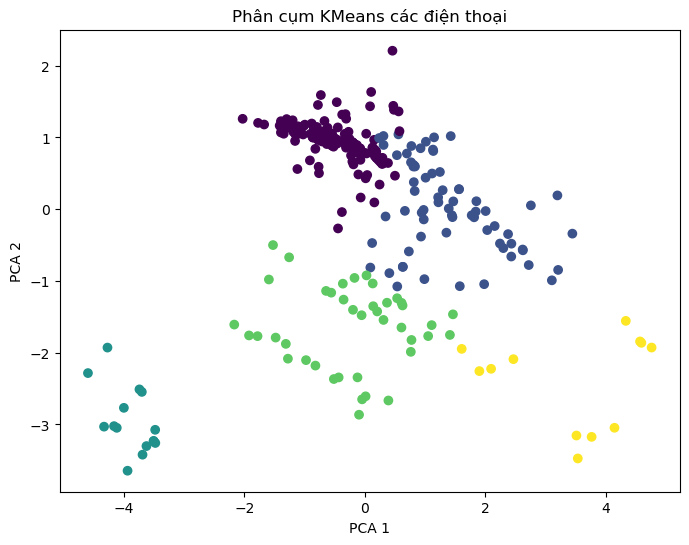

In [84]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu về 2D để vẽ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Phân cụm KMeans các điện thoại')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# plt.colorbar(label='Cluster')
plt.show()


c:\Users\Asus-FPT\anaconda3\envs\ML01\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Asus-FPT\anaconda3\envs\ML01\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Asus-FPT\anaconda3\envs\ML01\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Asus-FPT\anaconda3\envs\ML01\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

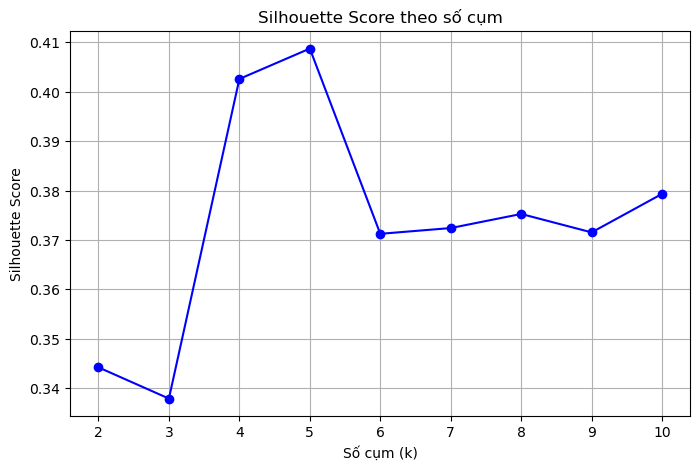

In [85]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

silhouette_scores = []
K = range(2, 11)  # Phải bắt đầu từ 2 vì k=1 không có ý nghĩa

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Vẽ biểu đồ Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score theo số cụm')
plt.xticks(K)
plt.grid(True)
plt.show()
